In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')

In [3]:
data["target"] = data["unfinished"]
data.target = data.target.map({0: 1, 1: 0})

In [4]:
data.head()

,unfinished,expected_hours,price,target
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [5]:
data.tail()

,unfinished,expected_hours,price,target
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [6]:
data = data.drop("unfinished", axis=1)
data

,expected_hours,price,target
0,26,192,0
1,88,9015,0
2,89,2577,0
3,42,275,0
4,39,170,0
...,...,...,...
2152,80,7518,1
2153,52,1332,0
2154,40,473,1
2155,75,5324,1


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

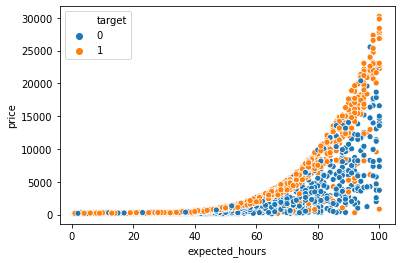

In [7]:
sns.scatterplot(x="expected_hours", y="price", hue="target", data=data)

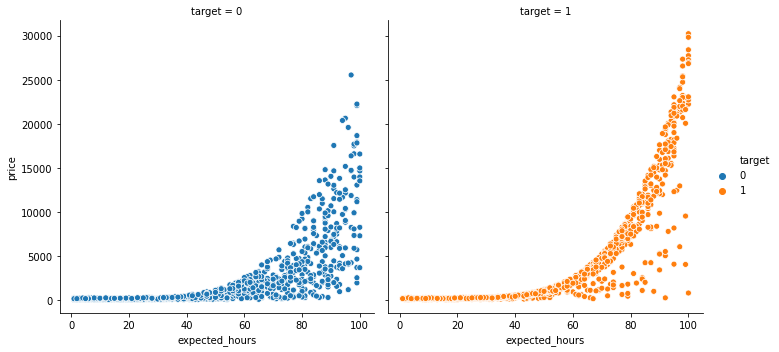

In [8]:
sns.relplot(x="expected_hours", y="price", hue="target", col="target", data=data)

In [9]:
columns = [col for col in data.columns if col != "target"]
x = data[columns]
y = data["target"]

In [10]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.25, stratify=y)

In [11]:
train_y.value_counts()

1    850
0    767
Name: target, dtype: int64

In [12]:
model = LinearSVC()
model.fit(train_x, train_y)
predict = model.predict(test_x)

/home/marcos/anaconda3/envs/classify/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [13]:
acc = accuracy_score(test_y, predict)
print("Model accuracy: %.2f" % (acc*100))

Model accuracy: 51.48


In [14]:
baseline_0 = np.zeros(test_y.shape[0])
baseline_1 = np.ones(test_y.shape[0])

acc = accuracy_score(test_y, baseline_0)
print("Accuracy of 0-baseline: %.2f" % (acc*100))

acc = accuracy_score(test_y, baseline_1)
print("Accuracy of 1-baseline: %.2f" % (acc*100))

Accuracy of 0-baseline: 47.41
Accuracy of 1-baseline: 52.59


In [15]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()
print(x_min, x_max, y_min, y_max)

1 100 101 30223


In [16]:
pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

In [17]:
xx, yy = np.meshgrid(x_axis, y_axis)
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [18]:
xx, yy = np.meshgrid(x_axis, y_axis)
xx.ravel()

array([ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01])

In [19]:
xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]
points

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.992178e+04],
       [9.802000e+01, 2.992178e+04],
       [9.901000e+01, 2.992178e+04]])

In [20]:
pred_points = model.predict(points)
pred_points = pred_points.reshape(xx.shape)

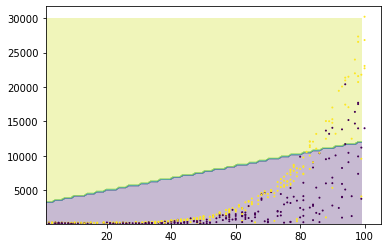

In [21]:
plt.contourf(xx, yy, pred_points, alpha=.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)